In [1]:
import MisrToolkit as Mtk
from MisrToolkit import *
import os
import numpy as np
from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

In [2]:
path_num = "071"
orbit_num = 87048
start_block = 1
end_block = 46
cam = "CF"

In [3]:
hdf_dir = "/media/ehsan/6T_part1/14528_apr2016"

hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P"+path_num+"_O0"+str(orbit_num)+"_"+cam+"_F03_0024.b003-046.f49e0896e.hdf"

In [4]:
hdf_file_fp = os.path.join(hdf_dir,hdf_file)
print(os.path.isfile(hdf_file_fp))
print(hdf_file_fp)

True
/media/ehsan/6T_part1/14528_apr2016/MISR_AM1_GRP_ELLIPSOID_GM_P071_O087048_CF_F03_0024.b003-046.f49e0896e.hdf


In [5]:
input_hdf = MtkFile(hdf_file_fp)

In [6]:
input_hdf.block

(3, 46)

In [7]:
# m.file_name

In [8]:
input_hdf.grid_list

['BlueBand', 'GreenBand', 'RedBand', 'NIRBand', 'BRF Conversion Factors']

In [9]:
input_hdf.grid("RedBand").field_list

['Red Radiance/RDQI',
 'Red Radiance',
 'Red RDQI',
 'Red DN',
 'Red Equivalent Reflectance',
 'Red Brf']

In [10]:
input_hdf.grid("RedBand").native_field_list

['Red Radiance/RDQI']

In [11]:
r = MtkRegion(int(path_num), start_block, end_block)

In [12]:
input_hdf.grid("RedBand").field("Red Radiance/RDQI").fill_value

65515

In [13]:
redband = input_hdf.grid("RedBand").field("Red Radiance/RDQI").read(r).data()

In [14]:
print("redBand min: %d" %redband.min())
print("redBand med: %d" %np.median(redband))
print("redBand max: %d" %redband.max())

redBand min: 192
redBand med: 25936
redBand max: 65523


In [15]:
redband.shape

(23552, 2560)

In [16]:
redband

array([[65515, 65515, 65515, ..., 65515, 65515, 65515],
       [65515, 65515, 65515, ..., 65515, 65515, 65515],
       [65515, 65515, 65515, ..., 65515, 65515, 65515],
       ...,
       [65515, 65515, 65515, ..., 65515, 65515, 65515],
       [65515, 65515, 65515, ..., 65515, 65515, 65515],
       [65515, 65515, 65515, ..., 65515, 65515, 65515]], dtype=uint16)

In [17]:
# def rescale(in_arr):
#     domain = in_arr.max()-in_arr.min()
#     for i in 

In [18]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr):
    write_mode = 0
    
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(20,20))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, input_array)
        #     plt.savefig(out_img)
    
    return 0

<Figure size 432x288 with 0 Axes>

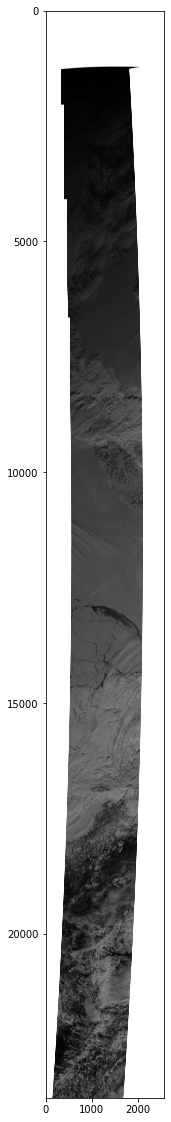

0

In [19]:
plot_here_and_write(redband)